In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect(r'./db/vivino.db')

cur = conn.cursor()

Exploration

In [3]:
cur.execute("""
            SELECT * FROM sqlite_master WHERE type='table';
            """ )

cur.fetchall()

[('table',
  'countries',
  'countries',
  2,
  'CREATE TABLE countries (\n\tcode VARCHAR NOT NULL, \n\tname VARCHAR, \n\tregions_count INTEGER, \n\tusers_count INTEGER, \n\twines_count INTEGER, \n\twineries_count INTEGER, \n\tPRIMARY KEY (code)\n)'),
 ('table',
  'grapes',
  'grapes',
  4,
  'CREATE TABLE grapes (\n\tid INTEGER NOT NULL, \n\tname VARCHAR, \n\tPRIMARY KEY (id)\n)'),
 ('table',
  'wineries',
  'wineries',
  5,
  'CREATE TABLE wineries (\n\tid INTEGER NOT NULL, \n\tname VARCHAR, \n\tPRIMARY KEY (id)\n)'),
 ('table',
  'flavor_groups',
  'flavor_groups',
  6,
  'CREATE TABLE flavor_groups (\n\tname VARCHAR NOT NULL, \n\tPRIMARY KEY (name)\n)'),
 ('table',
  'keywords',
  'keywords',
  8,
  'CREATE TABLE keywords (\n\tid INTEGER NOT NULL, \n\tname VARCHAR, \n\tPRIMARY KEY (id)\n)'),
 ('table',
  'regions',
  'regions',
  9,
  'CREATE TABLE regions (\n\tid INTEGER NOT NULL, \n\tname VARCHAR, \n\tcountry_code VARCHAR, \n\tPRIMARY KEY (id), \n\tFOREIGN KEY(country_code) REFER

In [4]:
cur.execute(
    """SELECT DISTINCT name 
    FROM countries"""
)

cur.fetchall()

[('Italie',),
 ('France',),
 ('États-Unis',),
 ('Espagne',),
 ('Portugal',),
 ('Australie',),
 ('Hongrie',),
 ('Afrique du Sud',),
 ('Allemagne',),
 ('Chili',),
 ('Moldavie',),
 ('Argentine',),
 ('Grèce',),
 ('Israël',),
 ('Roumanie',),
 ('Croatie',),
 ('Suisse',)]

WINES WITH THE HIGHEST RANKING

In [5]:

query_wines = """
    SELECT * FROM wines
    """

wines_df = pd.read_sql_query(query_wines, conn)

wines_df 


,id,name,is_natural,region_id,winery_id,ratings_average,ratings_count,url,acidity,fizziness,intensity,sweetness,tannin,user_structure_count
0,1213,Vin Santo di Montepulciano,0,2693,1574,4.6,773,https://www.seulementproduitsitaliens.be/spec_...,4.492628,NaN,3.992133,4.952543,NaN,0.0
1,1268,St. Henri Shiraz,0,7,1305,4.4,17326,https://www.wijnig.nl/penfolds-st-henri-shiraz...,3.015245,NaN,4.612774,2.092192,3.103089,1309.0
2,1471,Siepi,0,394,1620,4.4,8129,https://www.topwijnen.be/nl/product/wijnen/ita...,3.156144,NaN,3.491866,1.807986,2.985634,755.0
3,1647,Solare Toscana,0,394,4772,4.2,4961,https://www.seulementproduitsitaliens.be/spec_...,3.158376,NaN,3.321616,1.701897,3.038064,485.0
4,1651,Tenuta Tignanello 'Solaia',0,394,1252,4.6,33143,http://www.vivino.com/wines/159347388,3.064164,NaN,3.450713,1.888549,2.970583,2131.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,10203724,Elevage Branco,0,1395,32935,4.5,53,https://www.grandcruwijnen.nl/2021-herdade-do-...,2.396842,NaN,2.889368,1.307053,NaN,10.0
1016,10266383,Moss Blanc Verdicchio dei Castelli di Jesi Cla...,0,2660,8194,4.6,94,https://www.vinio.nl/products/azienda-santa-ba...,3.785753,NaN,3.740137,2.024110,NaN,5.0
1017,10746470,Academia Purcari Rară Neagră,0,1124,9534,4.5,73,https://tezauro.myshopify.com/products/academi...,NaN,NaN,NaN,NaN,NaN,NaN
1018,10773117,Paralupi Appassimento,0,548,12590,4.4,575,https://www.seulementproduitsitaliens.be/vino/...,2.140114,NaN,4.730000,2.884680,2.606918,47.0


In [6]:
query_vintages = "SELECT * FROM vintages"

vintages_df = pd.read_sql_query(query_vintages, conn)
vintages_df

,id,name,wine_id,ratings_average,ratings_count,year,price_euros,price_discounted_from,price_discount_percentage,bottle_volume_ml
0,2036,Mazzei Siepi 2005,1471,4.4,580,2005,168.750000,NaN,NaN,750
1,2202,Antinori Tignanello 2005,1652,4.5,1933,2005,750.000000,NaN,NaN,1500
2,10343,Casanova di Neri Tenuta Nuova Brunello di Mont...,9712,4.5,611,2001,420.000000,NaN,NaN,750
3,10786,Poggio Antico Altero Brunello di Montalcino 2006,10152,4.5,236,2006,121.250000,NaN,NaN,750
4,10809,Château Angelus Saint-Émilion Grand Cru (Premi...,10175,4.5,876,2007,726.250000,NaN,NaN,750
...,...,...,...,...,...,...,...,...,...,...
2045,173167924,Capichera VT Vendemmia Tardiva 2021,2486585,0.0,1,2021,74.000000,NaN,NaN,750
2046,173338092,Martin Waßmer Castellberg Pinot Noir 2020,3094569,0.0,6,2020,73.000000,NaN,NaN,750
2047,173555750,Anselmet Semel Pater 2021,3596240,0.0,10,2021,68.000000,NaN,NaN,750
2048,173849199,Henri Giraud Collection Fût de Chêne Brut Cham...,11339017,0.0,4,1998,895.400000,NaN,NaN,750


In [7]:
query_top_vintages = """SELECT name, ratings_average, ratings_count, year, price_euros, bottle_volume_ml FROM vintages
WHERE ratings_count > 1000
AND price_euros BETWEEN 0 AND 1000
ORDER BY ratings_average DESC
LIMIT 10"""

top_vintages_df = pd.read_sql_query(query_top_vintages, conn)
top_vintages_df

,name,ratings_average,ratings_count,year,price_euros,bottle_volume_ml
0,Louis Roederer Cristal Brut Champagne (Millési...,4.7,3475,2002,896.25,750
1,Tenuta San Guido Sassicaia 1997,4.7,1533,1997,747.50,750
2,Antinori Tenuta Tignanello 'Solaia' 2007,4.7,1564,2007,668.75,750
3,Dal Forno Romano Amarone della Valpolicella Mo...,4.7,1269,2006,616.25,750
4,Antinori Tenuta Tignanello 'Solaia' 2009,4.7,2186,2009,705.00,750
5,Château Pontet-Canet Pauillac (Grand Cru Class...,4.7,3275,2009,597.50,750
6,Château d'Yquem Sauternes 2005,4.7,1858,2005,928.30,750
7,Ornellaia Bolgheri Superiore 2005,4.7,1326,2005,425.00,750
8,Ornellaia Bolgheri Superiore 2007,4.7,2181,2007,533.75,750
9,Château d'Yquem Sauternes 2006,4.7,1002,2006,595.00,750


In [99]:
query_wines ="""SELECT wines.name AS name_of_wine, vintages.name, wines.ratings_average, vintages.price_euros, vintages.year FROM wines
JOIN vintages ON vintages.wine_id = wines.id
WHERE wines.ratings_count > 1000
--WHERE wines.name = 'Cabernet Sauvignon'
ORDER BY vintages.ratings_average DESC
;
"""

wines_df = pd.read_sql_query(query_wines, conn)
wines_df

DatabaseError: Execution failed on sql 'SELECT wines.name AS name_of_wine, vintages.name, wines.ratings_average, vintages.price_euros, vintages.year FROM wines
JOIN vintages ON vintages.wine_id = wines.id
WHERE wines.ratings_count > 1000
WHERE wines.name = 'Cabernet Sauvignon'
ORDER BY vintages.ratings_average DESC
;
': near "WHERE": syntax error

Let's plot the price distribution of Cabernet Sauvignon

In [9]:
import plotly.express as px

fig = px.histogram(wines_df, x = "year", y = "price_euros")
fig.show()

In [10]:
import plotly.express as px

fig = px.histogram(wines_df, x = "ratings_average", y = "price_euros")
fig.show()


In [11]:
query_tastes_of_hu = """SELECT keywords_wine.group_name, count(*), wines.name AS wine_name, countries.name AS country_name FROM keywords_wine
JOIN wines ON keywords_wine.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
WHERE country_name = "Hongrie"
GROUP BY keywords_wine.group_name

"""

hu_df = pd.read_sql_query(query_tastes_of_hu, conn)
hu_df

,group_name,count(*),wine_name,country_name
0,black_fruit,24,5 Puttonyos Aszú (Blue Label),Hongrie
1,citrus_fruit,106,Tokaji Aszú 5 Puttonyos,Hongrie
2,dried_fruit,62,Tokaji Aszú 3 Puttonyos,Hongrie
3,earth,156,Tokaji Aszú 6 Puttonyos,Hongrie
4,floral,61,Tokaji Aszú 6 Puttonyos,Hongrie
5,microbio,85,Tokaji Aszú 6 Puttonyos,Hongrie
6,non_oak,162,Tokaji Aszú 6 Puttonyos,Hongrie
7,oak,164,Tokaji Aszú 6 Puttonyos,Hongrie
8,red_fruit,33,Tokaji Aszú 3 Puttonyos,Hongrie
9,spices,91,5 Puttonyos Aszú (Blue Label),Hongrie


In [106]:
fig = px.pie(hu_df, values = "count(*)", names="group_name", title = "Tastes of Hungary",
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(
    legend_title_text="Tastes", width = 500, height = 500)
fig.show()

Investigating the wine producing countries

In [13]:
query_countries = """SELECT countries.name AS country_name, wines.name AS wine_name, MAX(ratings_average) AS average_ratings
                FROM countries
JOIN regions ON countries.code == regions.country_code
JOIN wines ON wines.region_id == regions.id
GROUP BY country_name
ORDER BY average_ratings DESC
LIMIT 10;"""

countries_df = pd.read_sql_query(query_countries, conn)
countries_df

,country_name,wine_name,average_ratings
0,États-Unis,Cabernet Sauvignon,4.8
1,Italie,Amarone della Valpolicella Classico Riserva,4.8
2,France,Cristal Rosé Vinothèque,4.8
3,Espagne,Mágico,4.8
4,Hongrie,Eszencia,4.7
5,Australie,Grange,4.7
6,Allemagne,Scharzhofberger Riesling Eiswein,4.7
7,Afrique du Sud,Book 17 XVII,4.7
8,Portugal,Tordiz 40 Year Old Tawny Port,4.6
9,Chili,Almaviva,4.6


In [14]:
fig = px.bar(countries_df, x = "country_name", y="average_ratings")
fig.show()

FINDING THE 3 BEST WINERIEs

In [15]:
query_all_wineries = """ SELECT wineries.name AS winery_name, wines.name AS wine_name FROM wineries
JOIN wines ON wineries.id == wines.winery_id"""

df_all_wineries = pd.read_sql_query(query_all_wineries, conn)
df_all_wineries

,winery_name,wine_name
0,Tenuta Tignanello 'Solaia',The Armagh Shiraz
1,Tignanello,Colheita Porto
2,Siepi,Lion Tamer Napa Valley Red Blend
3,Corte di Cama Sforzato di Valtellina,Raut Lagrein


In [16]:
query_wineries = """SELECT wineries.name AS name_winery, AVG(ratings_average) AS average_rating
FROM wineries
JOIN wines ON wines.winery_id = wineries.id
--GROUP BY name_winery
--ORDER BY average_rating DESC
"""

wineries_df = pd.read_sql_query(query_wineries,conn)
wineries_df

,name_winery,average_rating
0,Tenuta Tignanello 'Solaia',4.425


INVESTIGATING tastes: coffee, toast, green apple, cream, citrus

In [17]:
query_tastes = """SELECT keywords.name AS taste_subtype, wines.name AS wine_name, ratings_average, count FROM keywords_wine
JOIN keywords ON keywords_wine.keyword_id = keywords.id
JOIN wines ON keywords_wine.wine_id = wines.id
WHERE keywords.name IN ("coffee", "toast", "green apple", "cream", "citrus") AND
count > 10
GROUP BY wine_name
ORDER BY wine_name 
"""

tastes_df = pd.read_sql_query(query_tastes, conn)

tastes_df

,taste_subtype,wine_name,ratings_average,count
0,cream,'Giulio Ferrari' Riserva del Fondatore,4.6,72
1,coffee,25 anni Montefalco Sagrantino,4.3,23
2,green apple,5 Puttonyos Aszú (Blue Label),4.4,12
3,coffee,5 Stelle Sfursat,4.5,35
4,coffee,50 & 50,4.4,13
...,...,...,...,...
353,citrus,Vénus Blanc de Blancs Brut Nature Champagne Gr...,4.4,21
354,coffee,Vürsù Barbaresco Starderi,4.4,16
355,coffee,Vürsù Barolo Campè,4.4,13
356,coffee,Yarden Katzrin,4.5,17


Looking for the wines that have all the five tastes

In [89]:
query_five_tastes = """SELECT GROUP_CONCAT (DISTINCT(keywords.name)) AS tastes, wines.name AS wine_name, vintages.name AS vintage_name, wines.ratings_average, keywords_wine.count AS user_count FROM keywords_wine
JOIN vintages ON wines.id = vintages.wine_id
JOIN keywords ON keywords_wine.keyword_id = keywords.id
JOIN wines ON keywords_wine.wine_id = wines.id
WHERE keywords.name IN ("coffee", "toast", "green apple", "cream", "citrus") AND
user_count >= 10
GROUP BY wines.name
HAVING COUNT(DISTINCT keywords.name) = 5
ORDER BY wines.ratings_average DESC ;
"""

five_tastes_df = pd.read_sql_query(query_five_tastes, conn)

five_tastes_df

,tastes,wine_name,vintage_name,ratings_average,user_count
0,"green apple,coffee,toast,citrus,cream",Sauternes,Château d'Yquem Sauternes 1962,4.7,13
1,"toast,coffee,cream,green apple,citrus",P2 Plénitude Brut Champagne,Dom Pérignon P2 Plénitude Brut Champagne 2003,4.7,161
2,"citrus,toast,coffee,cream,green apple",Le Mesnil Blanc de Blancs (Cuvée S) Brut Champ...,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,4.7,240
3,"toast,coffee,cream,green apple,citrus",Vintage,Krug Vintage 1996,4.6,356
4,"toast,coffee,cream,green apple,citrus",Sir Winston Churchill Brut Champagne,Pol Roger Sir Winston Churchill Brut Champagne...,4.6,282
5,"toast,coffee,cream,green apple,citrus",R.D Extra Brut Champagne (Récemment Dégorgé),Bollinger R.D Extra Brut Champagne (Récemment ...,4.6,163
6,"toast,coffee,cream,citrus,green apple",Grande Cuvée,Krug Grande Cuvée,4.6,713
7,"toast,coffee,green apple,citrus,cream",Cristal Brut Champagne (Millésimé),Louis Roederer Cristal Brut Champagne (Millési...,4.6,464
8,"toast,coffee,cream,green apple,citrus",Brut Champagne,Dom Pérignon Brut Champagne 2000,4.6,2165
9,"toast,coffee,cream,citrus,green apple",Blanc des Millénaires,Charles Heidsieck Blanc des Millénaires 2007,4.6,160


In [19]:
query_check_tastes = """SELECT keywords.name AS taste_subtype, wines.name AS wine_name, ratings_average, user_structure_count FROM keywords_wine
JOIN keywords ON keywords_wine.keyword_id = keywords.id
JOIN wines ON keywords_wine.wine_id = wines.id
WHERE keywords.name IN ("coffee", "toast", "green apple", "cream", "citrus") 
AND wine_name = "Vintage"
ORDER BY wine_name 
"""

check_df = pd.read_sql_query(query_check_tastes, conn)

check_df

,taste_subtype,wine_name,ratings_average,user_structure_count
0,citrus,Vintage,4.6,2167
1,coffee,Vintage,4.6,2167
2,coffee,Vintage,4.6,2167
3,cream,Vintage,4.6,2167
4,green apple,Vintage,4.6,2167
5,toast,Vintage,4.6,2167
6,toast,Vintage,4.6,2167


TOP 3 MOST COMMON GRAPES - top 5 best wines

In [20]:
query_common_grapes = """SELECT DISTINCT grapes.name AS name_of_grape, wines_count FROM grapes
JOIN most_used_grapes_per_country ON most_used_grapes_per_country.grape_id = grapes.id
--JOIN countries ON most_used_grapes_per_country.country_code = countries.code
ORDER BY wines_count DESC
LIMIT 3
--GROUP BY country_code
--JOIN most_used_grapes_per_country ON 
"""

common_grapes_df = pd.read_sql_query(query_common_grapes, conn)
common_grapes_df

,name_of_grape,wines_count
0,Cabernet Sauvignon,801751
1,Chardonnay,604208
2,Pinot Noir,572334


In [93]:
top_five_cabernet = """SELECT wines.name AS wine_name, wines.ratings_average, vintages.name AS vintage_name, url from wines
JOIN vintages on wines.id = vintages.wine_id
WHERE wines.name LIKE '%Cabernet Sauvignon%'
ORDER BY wines.ratings_average DESC
LIMIT 5"""

top_five_cab_df = pd.read_sql_query(top_five_cabernet, conn)
top_five_cab_df

,wine_name,ratings_average,vintage_name,url
0,Cabernet Sauvignon,4.8,Scarecrow Cabernet Sauvignon 2015,https://www.seulementproduitsitaliens.be/spec_...
1,Special Selection Cabernet Sauvignon,4.7,Caymus Special Selection Cabernet Sauvignon 1997,https://www.seulementproduitsitaliens.be/spec_...
2,Special Selection Cabernet Sauvignon,4.7,Caymus Special Selection Cabernet Sauvignon 2017,https://www.seulementproduitsitaliens.be/spec_...
3,Beckstoffer To Kalon Vineyard Cabernet Sauvignon,4.6,Paul Hobbs Beckstoffer To Kalon Vineyard Caber...,https://joyvino.be/products/paul-hobbs-becksto...
4,Cabernet Sauvignon (Signature),4.6,Darioush Cabernet Sauvignon (Signature) 2018,https://artevino.be/product/darioush-signature...


In [95]:
top_five_pinot = """SELECT wines.name AS wine_name, wines.ratings_average, vintages.name AS vintage_name, url from wines
JOIN vintages on wines.id = vintages.wine_id
WHERE wines.name LIKE '%Pinot Noir%'
ORDER BY wines.ratings_average DESC
LIMIT 5"""

top_five_pinot_df = pd.read_sql_query(top_five_pinot, conn)
top_five_pinot_df

,wine_name,ratings_average,vintage_name,url
0,Grace Vineyard Pinot Noir,4.5,Domaine Serene Grace Vineyard Pinot Noir 2018,https://www.grandcruwijnen.nl/2018-domaine-ser...
1,Mark Bradford Vineyard Pinot Noir,4.5,Domaine Serene Mark Bradford Vineyard Pinot No...,https://www.grandcruwijnen.nl/2018-domaine-ser...
2,Finn Pinot Noir,4.5,DuMOL Finn Pinot Noir 2019,https://www.grandcruwijnen.nl/2019-dumol-pinot...
3,Alpine Hillside Pinot Noir,4.5,Rhys Vineyards Alpine Hillside Pinot Noir 2019,https://hermanwines.com/products/alpine-vineya...
4,Finn Pinot Noir,4.5,DuMOL Finn Pinot Noir 2020,https://www.grandcruwijnen.nl/2019-dumol-pinot...


In [94]:
top_five_chardonnay = """SELECT wines.name AS wine_name, wines.ratings_average, vintages.name AS vintage_name, url from wines
JOIN vintages on wines.id = vintages.wine_id
WHERE wines.name LIKE '%Chardonnay%'
ORDER BY wines.ratings_average DESC
LIMIT 5"""

top_five_chardonnay_df = pd.read_sql_query(top_five_chardonnay, conn)
top_five_chardonnay_df

,wine_name,ratings_average,vintage_name,url
0,Bentrock Vineyard Chardonnay,4.5,Racines Bentrock Vineyard Chardonnay 2019,https://hermanwines.com/products/bentrock-char...
1,Reserve Chardonnay,4.5,Lismore Reserve Chardonnay 2021,https://www.wijnkooperijdelange.nl/Lismore-Est...
2,Chloe Chardonnay,4.5,DuMOL Chloe Chardonnay 2020,https://www.grandcruwijnen.nl/2020-dumol-chloe...
3,Chardonnay,4.4,Capensis Chardonnay 2015,https://joyvino.be/products/capensis-chardonna...
4,Chardonnay,4.4,Capensis Chardonnay 2016,https://joyvino.be/products/capensis-chardonna...


COUNTRY leaderboard

In [96]:
top_vint_countries = """SELECT country_code, countries.name AS country, AVG(vintages.ratings_average) as average_rating, vintages.ratings_count FROM vintages
JOIN wines on wines.id = vintages.wine_id
JOIN regions on regions.id = wines.region_id
JOIN countries ON regions.country_code = countries.code
WHERE vintages.ratings_count > 100
GROUP BY country
ORDER BY average_rating DESC"""

top_vint_countries_df = pd.read_sql_query(top_vint_countries,conn)
top_vint_countries_df

,country_code,country,average_rating,ratings_count
0,us,États-Unis,4.553623,299
1,fr,France,4.546439,876
2,au,Australie,4.533333,509
3,it,Italie,4.508587,580
4,md,Moldavie,4.500000,2031
5,pt,Portugal,4.494118,302
6,es,Espagne,4.489063,212
7,za,Afrique du Sud,4.478947,246
8,cl,Chili,4.477273,1037
9,ar,Argentine,4.476000,872


Visualize the countries and their average score

In [97]:
import plotly.express as px

fig = px.bar(top_vint_countries_df, x = "country", y = "average_rating", text="average_rating", title= "Comparison of Average Vintage Ratings Across Countries",
             color = "average_rating", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_yaxes(range=[4.3, 4.6])
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_layout(xaxis_title="Country", yaxis_title="Average Rating")
fig.show()

In [26]:
top_win_countries = """SELECT AVG(wines.ratings_average) as average_rating, country_code, countries.name AS country, wines.ratings_count FROM wines
JOIN regions on regions.id = wines.region_id
JOIN countries ON regions.country_code = countries.code
WHERE wines.ratings_count > 100
GROUP BY country
ORDER BY average_rating DESC"""

top_win_countries_df = pd.read_sql_query(top_win_countries,conn)
top_win_countries_df

,average_rating,country_code,country,ratings_count
0,4.500000,il,Israël,894
1,4.490278,us,États-Unis,18694
2,4.475000,md,Moldavie,7604
3,4.460000,hu,Hongrie,2366
4,4.460000,de,Allemagne,3047
5,4.459091,za,Afrique du Sud,1638
6,4.454545,au,Australie,17326
7,4.441935,es,Espagne,4642
8,4.439228,fr,France,442
9,4.431250,cl,Chili,48075


In [98]:
import plotly.express as px

fig = px.bar(top_win_countries_df, x = "country", y = "average_rating", text="average_rating", title= "Comparison of Average Wine Ratings Across Countries",
             color = "average_rating", color_continuous_scale=px.colors.sequential.Viridis)
fig.update_yaxes(range=[4.2, 4.6])
fig.update_traces(texttemplate='%{text:.2f}')
fig.update_layout(xaxis_title="Country", yaxis_title="Average Rating")
fig.show()

Country

In [28]:
country_priority = """SELECT countries.name AS country, AVG(wines.ratings_average) AS average_rating, wines_count, users_count from wines
JOIN regions ON wines.region_id = regions.id 
JOIN countries ON regions.country_code = countries.code
GROUP BY countries.name
ORDER BY wines_count DESC, average_rating DESC;
"""

country_priority_df = pd.read_sql_query(country_priority, conn)

country_priority_df

,country,average_rating,wines_count,users_count
0,France,4.447130,422503,5973301
1,Italie,4.430026,274658,4270717
2,États-Unis,4.490541,204060,12273684
3,Allemagne,4.500000,164533,2549989
4,Espagne,4.443617,102662,2264396
5,Australie,4.458333,90954,1022965
6,Chili,4.431250,41191,326757
7,Portugal,4.435714,39847,1123535
8,Argentine,4.417391,36121,629532
9,Suisse,4.350000,33656,1601799


In [29]:
import plotly.express as px

fig = px.bar(country_priority_df, x = "country", y = "wines_count", text="wines_count", title= "Amount of wines per each country")
fig.update_layout(xaxis_title="Country", yaxis_title="Average Rating")
fig.update_traces(textfont=dict(color='purple'))

fig.show()

Bubble chart of countries

In [30]:
import plotly.express as px

fig = px.scatter(country_priority_df, x = "users_count", y = "average_rating", size = "wines_count", color="country", title = "Visualization of Wine Data: Count, Users, and Ratings by Country")
fig.update_layout(xaxis_title="Number of wines", yaxis_title="Average Rating", legend_title_text="Country")

fig.show()



In [31]:
country_priority_new = """
SELECT countries.name AS country,
       AVG(wines.ratings_average) AS average_rating,
       wines_count,
       users_count,
       CAST(users_count AS REAL) / CAST(wines_count AS REAL) AS user_wine_ratio
FROM wines
JOIN regions ON wines.region_id = regions.id 
JOIN countries ON regions.country_code = countries.code
GROUP BY countries.name
ORDER BY user_wine_ratio DESC;
"""

country_priority_new_df = pd.read_sql_query(country_priority_new, conn)

country_priority_new_df

,country,average_rating,wines_count,users_count,user_wine_ratio
0,États-Unis,4.490541,204060,12273684,60.147427
1,Suisse,4.350000,33656,1601799,47.593267
2,Roumanie,4.400000,6841,228185,33.355504
3,Portugal,4.435714,39847,1123535,28.196226
4,Israël,4.500000,5435,150549,27.699908
5,Espagne,4.443617,102662,2264396,22.056808
6,Argentine,4.417391,36121,629532,17.428421
7,Italie,4.430026,274658,4270717,15.549218
8,Allemagne,4.500000,164533,2549989,15.498344
9,France,4.447130,422503,5973301,14.137890


What about the vintages?

In [32]:
country_priority_vint = """SELECT countries.name AS country, AVG(vintages.ratings_average) AS average_rating, wines_count, users_count, CAST(users_count AS REAL) / CAST(wines_count AS REAL) AS user_wine_ratio from vintages
JOIN wines ON vintages.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id 
JOIN countries ON regions.country_code = countries.code
GROUP BY countries.name
ORDER BY user_wine_ratio DESC;
"""

country_priority_vint_df = pd.read_sql_query(country_priority_vint, conn)

country_priority_vint_df

,country,average_rating,wines_count,users_count,user_wine_ratio
0,États-Unis,3.698214,204060,12273684,60.147427
1,Suisse,2.200000,33656,1601799,47.593267
2,Roumanie,4.500000,6841,228185,33.355504
3,Portugal,3.932258,39847,1123535,28.196226
4,Israël,0.000000,5435,150549,27.699908
5,Espagne,3.380916,102662,2264396,22.056808
6,Argentine,4.321429,36121,629532,17.428421
7,Italie,3.630266,274658,4270717,15.549218
8,Allemagne,1.695833,164533,2549989,15.498344
9,France,3.065049,422503,5973301,14.137890


In [33]:
import plotly.express as px

fig = px.scatter(country_priority_vint_df, x = "users_count", y = "average_rating", size = "wines_count", color="country", title = "Visualization of Wine Data: Count, Users, and Ratings by Country")
fig.update_layout(xaxis_title="Number of wines", yaxis_title="Average Rating", legend_title_text="Country")

fig.show()



Let's check some flavor distributions

In [34]:
query_tastes_of_USA = """SELECT keywords_wine.group_name, count(*), wines.name AS wine_name, countries.name AS country_name FROM keywords_wine
JOIN wines ON keywords_wine.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
WHERE country_name = "États-Unis"
GROUP BY keywords_wine.group_name

"""

us_df = pd.read_sql_query(query_tastes_of_USA, conn)
us_df

,group_name,count(*),wine_name,country_name
0,black_fruit,1163,Cabernet Sauvignon,États-Unis
1,citrus_fruit,326,Chardonnay,États-Unis
2,dried_fruit,383,Monte Bello,États-Unis
3,earth,2039,Monte Bello,États-Unis
4,floral,512,Chardonnay,États-Unis
5,microbio,641,Chardonnay,États-Unis
6,non_oak,1445,Cabernet Sauvignon,États-Unis
7,oak,2153,Monte Bello,États-Unis
8,red_fruit,936,Chardonnay,États-Unis
9,spices,1437,Cabernet Sauvignon,États-Unis


In [35]:
query_tastes_of_countries = """
SELECT keywords_wine.group_name,
       COUNT(*) AS wine_count,
       countries.name AS country
FROM keywords_wine
JOIN wines ON keywords_wine.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
GROUP BY country, keywords_wine.group_name
"""

df_country_taste_dist = pd.read_sql_query(query_tastes_of_countries, conn)
df_country_taste_dist

,group_name,wine_count,country
0,black_fruit,269,Afrique du Sud
1,citrus_fruit,76,Afrique du Sud
2,dried_fruit,93,Afrique du Sud
3,earth,431,Afrique du Sud
4,floral,101,Afrique du Sud
...,...,...,...
206,red_fruit,936,États-Unis
207,spices,1437,États-Unis
208,tree_fruit,298,États-Unis
209,tropical_fruit,163,États-Unis


In [36]:
fig = px.bar(df_country_taste_dist, x='country', y='wine_count', color='group_name',
             title='Distribution of Wine Flavors Across Countries',
             labels={'wine_count': 'Number of Wines', 'group_name': 'Flavor'},
             barmode='stack')

fig.update_layout(height=600)

fig.show()

In [37]:
fig = px.pie(us_df, values = "count(*)", names="group_name", title = "Distribution of tastes in the USA")
fig.show()

In [109]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

query_tastes_of_France = """SELECT keywords_wine.group_name, count(*), wines.name AS wine_name, countries.name AS country_name FROM keywords_wine
JOIN wines ON keywords_wine.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
WHERE country_name = "France"
GROUP BY keywords_wine.group_name
"""

fr_df = pd.read_sql_query(query_tastes_of_France, conn)
fr_df

query_tastes_of_Italy = """SELECT keywords_wine.group_name, count(*), wines.name AS wine_name, countries.name AS country_name FROM keywords_wine
JOIN wines ON keywords_wine.wine_id = wines.id
JOIN regions ON wines.region_id = regions.id
JOIN countries ON regions.country_code = countries.code
WHERE country_name = "Italie"
GROUP BY keywords_wine.group_name
"""

it_df = pd.read_sql_query(query_tastes_of_Italy, conn)
it_df

fig = make_subplots(rows=1, cols=3, subplot_titles=("France", "Italy", "USA"), specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Add pie charts to subplots
fig.add_trace(go.Pie(labels=fr_df["group_name"], values=fr_df["count(*)"], marker=dict(colors=px.colors.qualitative.Pastel)),
              row=1, col=1)
fig.add_trace(go.Pie(labels=it_df["group_name"], values=it_df["count(*)"], marker=dict(colors=px.colors.qualitative.Pastel)),
              row=1, col=2)
fig.add_trace(go.Pie(labels=us_df["group_name"], values=us_df["count(*)"], marker=dict(colors=px.colors.qualitative.Pastel)),
              row=1, col=3)

# Update layout
fig.update_layout(title="Distribution of tastes in France, Italy, and the USA")

# Show the plot
fig.show()

Wine properties and countries

In [71]:
query_prop = """SELECT countries.name AS country, AVG(acidity), AVG(fizziness), AVG(intensity), AVG(sweetness), AVG(tannin) from wines
JOIN regions ON regions.id = wines.region_id
JOIN countries ON regions.country_code = countries.code
GROUP BY country

"""

df_prop = pd.read_sql_query(query_prop, conn)

df_prop.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
country,Afrique du Sud,Allemagne,Argentine,Australie,Chili,Croatie,Espagne,France,Grèce,Hongrie,Israël,Italie,Moldavie,Portugal,Roumanie,Suisse,États-Unis
AVG(acidity),3.442303,4.435819,2.965674,3.065209,3.024669,4.436117,3.477691,3.852087,4.299877,4.807573,2.938603,3.474897,NaN,3.123038,3.172636,3.862937,3.478865
AVG(fizziness),NaN,NaN,NaN,NaN,NaN,NaN,3.402513,4.28603,NaN,NaN,NaN,3.30998,NaN,NaN,NaN,NaN,NaN
AVG(intensity),4.046132,3.254909,4.02871,4.537767,4.552571,4.087005,3.959763,3.70732,3.449386,3.148826,3.439461,3.795893,NaN,4.259337,3.31093,3.855662,4.4244
AVG(sweetness),1.917665,2.358388,2.072441,2.059063,1.726738,2.287386,2.002307,1.875598,1.510909,4.621564,1.738824,2.063218,NaN,3.196732,2.322248,2.469603,1.742801
AVG(tannin),3.295999,2.311893,2.919937,3.216684,3.44654,3.842538,3.548258,3.147939,2.86172,NaN,2.993057,3.364957,NaN,3.304343,3.268372,3.168959,3.290927


In [111]:
import plotly.express as px

# Assuming df_prop is your DataFrame containing the data
fig = px.bar(df_prop, x='country', y=['AVG(acidity)', 'AVG(fizziness)', 'AVG(intensity)', 'AVG(sweetness)', 'AVG(tannin)'],
             title='Average Wine Properties Across Countries',
             labels={'variable': 'Wine Property', 'value': 'Average Value'},
             barmode='group')
fig.show()

In [85]:
query_hu_prop = """SELECT AVG(acidity), AVG(fizziness), AVG(intensity), AVG(sweetness), AVG(tannin) from wines
JOIN regions ON regions.id = wines.region_id
JOIN countries ON regions.country_code = countries.code
WHERE countries.name = "Hongrie"
"""

df_hu_prop = pd.read_sql_query(query_hu_prop, conn)

df_hu_prop = df_hu_prop.transpose().fillna(0)

C:\Users\lucav\AppData\Local\Temp\ipykernel_20468\2877379232.py:9: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



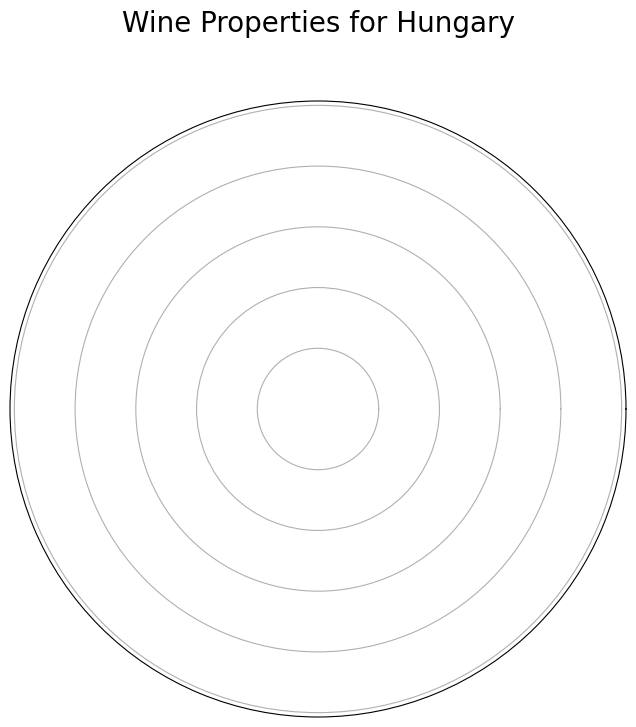

In [86]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_prop is your DataFrame containing the data for one country (e.g., Hungary)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

# Number of variables (properties)
num_vars = len(df_hu_prop.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start point at the end.
values = df_hu_prop.iloc[0].values.flatten().tolist()

# Plot data (only use the first num_vars values)
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2, linestyle='solid')

# Set labels for each axis
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Use angles without the last element
ax.set_xticklabels(df_hu_prop.columns[:-1], fontsize=12)  # Use columns without the last one

# Add a title
ax.set_title('Wine Properties for Hungary', size=20, color='black', y=1.1)


plt.show()


In [116]:
import plotly.express as px

# Normalize property values (optional)
#df_prop_normalized = (df_prop - df_prop.min()) / (df_prop.max() - df_prop.min())
df_prop_cleaned = df_prop.fillna(0)
# Create a bubble graph
fig = px.scatter(df_prop_cleaned, x='AVG(acidity)', y='AVG(fizziness)', size='AVG(sweetness)', color='country',
                 size_max=30, title='Bubble Graph of Wine Properties by Country',
                 labels={'AVG(acidity)': 'Acidity', 'AVG(fizziness)': 'Fizziness', 'AVG(sweetness)': 'Sweetness'})
fig.update_xaxes(range=[2, 5])
fig.update_layout(coloraxis_colorbar=dict(title='Sweetness'))
# Show plot
fig.show()


Vintage toplists

In [124]:
query_vint_top = """SELECT rank, vintages.name AS vintage_name, toplists.name AS toplist_name FROM vintage_toplists_rankings
JOIN vintages ON vintages.id = vintage_toplists_rankings.vintage_id
JOIN toplists ON toplists.id = vintage_toplists_rankings.top_list_id
WHERE rank = 1
"""

df_vint_top = pd.read_sql_query(query_vint_top, conn)

df_vint_top

,rank,vintage_name,toplist_name
0,1,Salon Le Mesnil Blanc de Blancs (Cuvée S) Brut...,Vivino's 2020 Wine Style Awards: French Champa...
1,1,Masseto Toscana 2006,Vivino's 2020 Wine Style Awards: Tuscan Red
2,1,Masseto Toscana 2005,Vivino's 2016 Wine Style Awards: Central Italy...
3,1,Scarecrow Cabernet Sauvignon 2015,Vivino's 2019 Wine Style Awards: Napa Valley C...
4,1,Ornellaia Bolgheri Superiore 2005,Vivino's 2019 Wine Style Awards: Italian Bolgheri
5,1,Masseto Toscana 2010,Vivino's 2017 Wine Style Awards: Central Italy...
6,1,Château Rayas Châteauneuf-du-Pape 2006,Vivino's 2020 Wine Style Awards: Southern Rhôn...
7,1,Masseto Toscana 2004,Vivino's 2018 Wine Style Awards: Tuscan Red
8,1,Château Rayas Châteauneuf-du-Pape 2001,Vivino's 2016 Wine Style Awards: Southern Rhôn...
9,1,Château Rayas Châteauneuf-du-Pape 2001,Vivino's 2017 Wine Style Awards: Southern Rhôn...
